Wskaźnik newsów - PKN Orlen
=========================

Notowanie
---------------

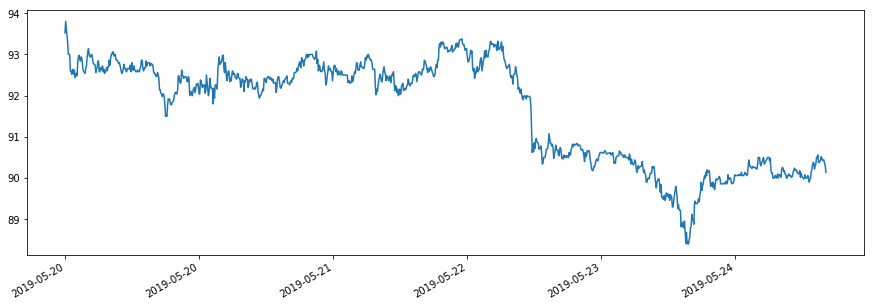

In [1]:
import share_price as sp
import plot_helper as ph
%matplotlib inline
data =sp.getLastWeekIntraday('PKNORLEN','20190520','20190525')    
ph.plot(data)                        


Analiza Twittów
----------------------

In [2]:
from twitt_processing import TwittProcessing
from twitter import Twitt
twp= TwittProcessing()

twp. KeyWords= { 'PKNORLEN' : {
                    'search': ['pkn orlen','ropa'] ,
                    'ignore':['uroczystość','ochotniczy','medal','bolid','smaczny','hot dog','medalistka','Lotta','kadet','bieg','sponsor',
                              'Duszyński','Małachowski','Wyciszkiewicz','Kszczot','Lisek','Kubica','Dąbrowskiego',
                              'RobertKubicaKlub','WilliamsRacing','Williams','AkademiiInwestowania'],
                    'sentiment':{
                        'kuluary':-1,
                        'wydać':-1,
                        'przesłuchiwać':-1,
                        'skazić':-1,
                        'brudny':-1,
                        'zanieczyścić':-1,
                        'zakręcić':-1,
                        'kryzys':-1,
                        'zakazić':-1,
                        'lepsza':1,
                        'tańszy':1,
                        'zyskać':1,
                        'konsolidacja':1,
                        'czysty':1
                        }
                    }
               }

twt =  twp.indicator('PKNORLEN','20190520','20190525')
for t in twt:
    if not t.ignore and t.power>100000 and t.sentiment==0:
        print('==========================================')
        print(str(t.power)+' '+ str(t.sentimentKeys) +' ' +str(t.date) +' ' + t.text)


266487 [] 2019-05-24 17:45:27 Rt @ AnnaZiobron : piknik olimpijski już jutro . od 12:00 na kępa Potocki . @ PKN_ORLEN @ PKOL_pl być Z ja . https : //t.co/hBbJI4rF4O 
125321 [] 2019-05-24 16:09:31 Rt @ AnitaWlodarczyk : 📣📣 taka taka , to już jutro - & GT ; piknik olimpijski 😍 kto Z Waś się wybierać ? 🤔 do zobaczyć od godz.12:00 na kępa Potoc… 
102099 [] 2019-05-24 13:10:50 @ AwskiZbigniew @ PKN_ORLEN być f1fobem ? 
397775 [] 2019-05-24 10:12:05 Rt @ wjakobik : # ważny : być porozumienie O dostawa rosyjski ropa do polski . do uzgodnić pozostawać rekompensata https : //t.co/93OqnCO1v… 
394239 [] 2019-05-24 09:40:36 Rt @ SylwekKaminski : @ wjakobik @ pern_sa @ Morawiecki @ Pern @ PKN_ORLEN @ GrupaLOTOS wniosek : móc mieć doczynienia Z `` wojna podwórkowy '' pomi… 
382884 [] 2019-05-24 09:22:05 Rt @ SylwekKaminski : @ wjakobik @ pern_sa @ Morawiecki @ Pern @ PKN_ORLEN @ GrupaLOTOS piękny rozwijać się dostawa drogi morski # ropanaftowa do… 
382884 [] 2019-05-24 09:21:48 Rt @ SylwekKaminski :

Wykres pokazujacy powiazanie miedzy cenami akcji a sentymentem twittów
------------------------------------------------------------------------------------------------------------

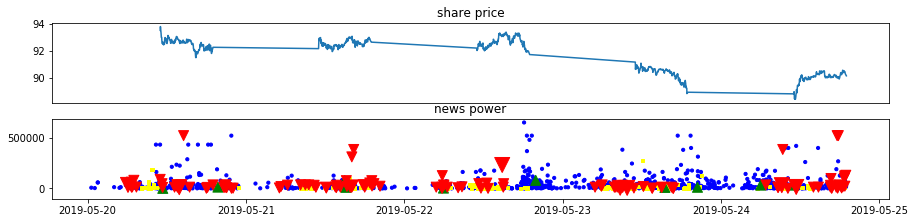

In [3]:
import plot_helper 
plot_helper.plot2(data,twt)